# Importing Dataset

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [12]:
data = pd.read_csv("D:\Data Science\Data set\Diamond Dataset.csv")

In [13]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [14]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [15]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [17]:
data = data.drop(['depth','table','x','y','z'], axis=1)
data.head()

,Unnamed: 0,carat,cut,color,clarity,price
0,1,0.23,Ideal,E,SI2,326
1,2,0.21,Premium,E,SI1,326
2,3,0.23,Good,E,VS1,327
3,4,0.29,Premium,I,VS2,334
4,5,0.31,Good,J,SI2,335


In [18]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
price           int64
dtype: object

In [19]:
data['price'] = data.price.astype(float)
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
price         float64
dtype: object

# Visualization


Text(0.5, 1.0, 'Diamond Price Distribution')

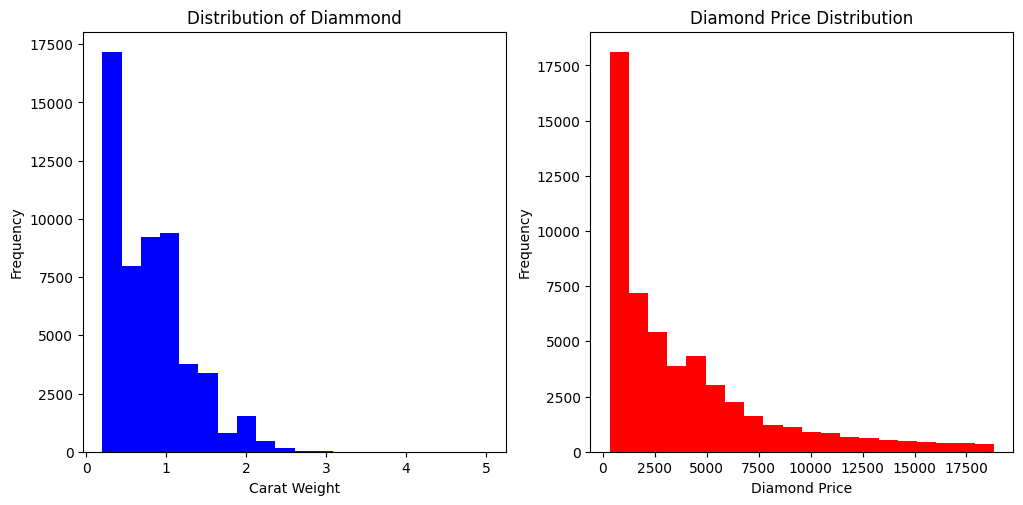

In [20]:
plt.figure(figsize=[12,12])
plt.subplot(221)
plt.hist(data['carat'], bins=20, color='b')
plt.xlabel("Carat Weight")
plt.ylabel("Frequency")
plt.title("Distribution of Diammond")
plt.subplot(222)
plt.hist(data['price'], bins=20, color='r')
plt.xlabel("Diamond Price")
plt.ylabel("Frequency")
plt.title("Diamond Price Distribution")

# Preprocessing

In [21]:
from sklearn.preprocessing import LabelEncoder
l1 = LabelEncoder()
label = l1.fit_transform(data['cut'])
label1= set(data['color'])
l2 = set(data['clarity'])
print(label1,l2,sep="\n")
l1.classes_

{'H', 'D', 'I', 'F', 'G', 'J', 'E'}
{'IF', 'SI1', 'I1', 'VS1', 'SI2', 'VVS1', 'VVS2', 'VS2'}


array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)

In [22]:
label

array([2, 3, 1, ..., 4, 3, 2])

In [23]:
data['cut_label'] = label
data.head()

,Unnamed: 0,carat,cut,color,clarity,price,cut_label
0,1,0.23,Ideal,E,SI2,326.0,2
1,2,0.21,Premium,E,SI1,326.0,3
2,3,0.23,Good,E,VS1,327.0,1
3,4,0.29,Premium,I,VS2,334.0,3
4,5,0.31,Good,J,SI2,335.0,1


In [24]:
l2 = LabelEncoder()
label1 = l2.fit_transform(data['clarity'])
data['clarity_label'] = label1
data.head()
print(set(label1))
print(list(zip(set(data['clarity']),set(label1))))

{0, 1, 2, 3, 4, 5, 6, 7}
[('IF', 0), ('SI1', 1), ('I1', 2), ('VS1', 3), ('SI2', 4), ('VVS1', 5), ('VVS2', 6), ('VS2', 7)]


In [25]:
data['color'] = data['color'].map({ 'D':1, 'E':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7, 'NA':8})
data['color'].fillna(0)

0        2
1        2
2        2
3        6
4        7
        ..
53935    1
53936    1
53937    1
53938    5
53939    1
Name: color, Length: 53940, dtype: int64

In [26]:
data['color'].isnull().sum()

0

In [27]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,price,cut_label,clarity_label
0,1,0.23,Ideal,2,SI2,326.0,2,3
1,2,0.21,Premium,2,SI1,326.0,3,2
2,3,0.23,Good,2,VS1,327.0,1,4
3,4,0.29,Premium,6,VS2,334.0,3,5
4,5,0.31,Good,7,SI2,335.0,1,3


In [28]:
y = data['price']
y.head()

0    326.0
1    326.0
2    327.0
3    334.0
4    335.0
Name: price, dtype: float64

In [29]:
x = data.drop(['Unnamed: 0','price','cut','clarity'], axis=1)
x.head()

,carat,color,cut_label,clarity_label
0,0.23,2,2,3
1,0.21,2,3,2
2,0.23,2,1,4
3,0.29,6,3,5
4,0.31,7,1,3


In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

In [31]:
len(x_train)

43152

In [32]:
len(y_test)

10788

In [33]:
len(data)

53940

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Algorithm Selection

In [35]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)
pred = linreg.predict(x_test)

In [36]:
from sklearn.metrics import r2_score
lr = r2_score(y_test, pred)*100
print(lr)

87.76517206528275


In [37]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(x_train,y_train)
pred1 = reg.predict(x_test)

In [38]:
dtr = r2_score(y_test, pred1)*100
print(dtr)

97.11287039414425


In [39]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50)
rf.fit(x_train,y_train)
pred2 = rf.predict(x_test)

In [40]:
rfr = r2_score(y_test, pred2)*100
print(rfr)

97.76441427242753


In [41]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
pred3 = knn.predict(x_test)

In [42]:
knr = r2_score(y_test,pred3)*100
print(knr)

97.55732859021302


In [43]:
from sklearn.linear_model import Lasso
lrg = Lasso()
lrg.fit(x_train, y_train)
pred4 = lrg.predict(x_test)

In [44]:
lgr = r2_score(y_test, pred4)*100
print(lgr)

87.76523078289839


In [45]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(x_train,  y_train)
pred5 = rid.predict(x_test)

In [46]:
ridr = r2_score(y_test, pred5)*100
print(ridr)

87.76517737916106


In [47]:
print("Linear Regression : ", lr)
print("Desicion Tree : ", dtr)
print("Random Forest Regressor : ", rfr)
print("KNN Regressor : ", knr)
print("Lasso Linear Model : ", lgr)
print("Ridge Linear Model : ", ridr)

Linear Regression :  87.76517206528275
Desicion Tree :  97.11287039414425
Random Forest Regressor :  97.76441427242753
KNN Regressor :  97.55732859021302
Lasso Linear Model :  87.76523078289839
Ridge Linear Model :  87.76517737916106


# Prediction

In [48]:
def prediction():
  carat = (input("Enter the value of carat (0 to 1) : "))
  cut = int(input("Enter the value of cut ('Fair': 1, 'Good': 2, 'Ideal': 3, 'Premium': 4, 'Very Good': 5) : "))
  clarity = int(input("Enter the value of the clarity {(VVS2, 0), (I1, 1), (SI2, 2), (SI1, 3), (VS2, 4), (IF, 5), (VVS1, 6), (VS1, 7)}: "))
  color = int(input("Enter the value of the color (D:1,E:2,F:3, G:4,H:5,I:6,J:7,NA:8) : "))

  price = rf.predict([[carat,cut,clarity,color]])

  print("The approximate price of that diamond is Rs.%.2f" %price)
prediction()


Enter the value of carat (0 to 1) : 0
Enter the value of cut ('Fair': 1, 'Good': 2, 'Ideal': 3, 'Premium': 4, 'Very Good': 5) : 4
Enter the value of the clarity {(VVS2, 0), (I1, 1), (SI2, 2), (SI1, 3), (VS2, 4), (IF, 5), (VVS1, 6), (VS1, 7)}: 6
Enter the value of the color (D:1,E:2,F:3, G:4,H:5,I:6,J:7,NA:8) : 7
The approximate price of that diamond is Rs.2330.36
